## Import Libraries and Data

In [1]:
# Import libraries
import os
import pandas as pd
from pandas import json_normalize
import numpy as np
import json

In [4]:
json_file = 'data/Florianopolis/florianopolis/Buy/unified/florianopolis_buy.json'
df = pd.read_json(json_file)


In [5]:
df

,displayAddressType,amenities,usableAreas,constructionStatus,listingType,description,title,unitTypes,nonActivationReason,propertyType,...,address.locationId,address.district,address.name,address.state,address.neighborhood,address.poisList,address.pois,address.valuableZones,advertiserContact.chat,advertiserContact.phones
0,ALL,"[PLAN, ELECTRICITY, SEWAGE, PAVED_STREET, INTE...",[1590],ConstructionStatus_NONE,USED,"Vendemos com exclusividade,Terreno muito bem l...",TERRENO DE 1590 M2 PARA PERMUTA ÁREA CONSTRUÍD...,[ALLOTMENT_LAND],NonActivationReason_NONE,UNIT,...,BR>Santa Catarina>NULL>Florianopolis>Barrios>C...,,,Santa Catarina,Carianos,"[BS:Avenida Deputado Diomício Freitas (13), BS...",[],[],,[48996356797]
1,ALL,[GARDEN],[12],ConstructionStatus_NONE,USED,Vagas de garagem extras para os condôminos do ...,FLORIANóPOLIS - Box/Garagem - Itacorubi,[BUSINESS],NonActivationReason_NONE,UNIT,...,BR>Santa Catarina>NULL>Florianopolis>Barrios>I...,,,Santa Catarina,Itacorubi,"[BS:Rodovia Admar Gonzaga (24), BS:Rodovia Adm...",[],[],,"[4833079001, 48999409000]"
2,STREET,"[ELEVATOR, AIR_CONDITIONING]",[12],ConstructionStatus_NONE,USED,"Vaga de garagem em prédio comercial, a 5 minut...",FLORIANóPOLIS - Box/Garagem - Trindade,[COMMERCIAL_PROPERTY],NonActivationReason_NONE,UNIT,...,BR>Santa Catarina>NULL>Florianopolis>Barrios>T...,,,Santa Catarina,Trindade,"[BS:Rua Profa. Maria Flora Pausewang (01), BS:...",[],[],,"[4832443444, 48999822319]"
3,STREET,[],[12],ConstructionStatus_NONE,USED,Ótima oportunidade de investimento! Box garage...,FLORIANóPOLIS - Box/Garagem - Centro,[COMMERCIAL_PROPERTY],NonActivationReason_NONE,UNIT,...,BR>Santa Catarina>NULL>Florianopolis>Barrios>C...,,,Santa Catarina,Centro,"[BS:Avenida Hercílio Luz, BS:Rua dos Ilhéus, B...",[],[],,"[4830288383, 48991271724]"
4,ALL,[GARAGE],[12],ConstructionStatus_NONE,USED,"Garagem para venda, Edifício Cittadella no cen...","Garagem para Venda em Florianópolis, Centro",[COMMERCIAL_PROPERTY],NonActivationReason_NONE,UNIT,...,BR>Santa Catarina>NULL>Florianopolis>Barrios>C...,,,Santa Catarina,Centro,"[BS:Avenida Hercílio Luz, BS:Rua dos Ilhéus, B...",[],[],,"[48984253415, 48999987245]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78955,ALL,"[CLOSET, LAUNDRY]",[141],ConstructionStatus_NONE,USED,Residencial Caminhos do Lampião II.<br>Casa (0...,casa - Campeche - Florianópolis,[HOME],NonActivationReason_NONE,UNIT,...,BR>Santa Catarina>NULL>Florianopolis>Barrios>C...,,,Santa Catarina,Campeche,"[BS:Rua do Gramal (04), BS:Rua do Gramal (02),...",[],[],,"[4833310600, 4833711003]"
78956,STREET,"[POOL, BARBECUE_GRILL, GATED_COMMUNITY, GYM, P...",[794],ConstructionStatus_NONE,USED,"Excelente terreno com 794,09m² de área privati...",Lote/Terreno para venda com 794 metros quadrad...,[ALLOTMENT_LAND],NonActivationReason_NONE,UNIT,...,BR>Santa Catarina>NULL>Florianopolis>Barrios>C...,,,Santa Catarina,Córrego Grande,"[BS:Rua Sebastião Laurentino da Silva (04), BS...",[],[],,[48998062611]
78957,NEIGHBORHOOD,"[FURNISHED, BARBECUE_GRILL, GATED_COMMUNITY, G...",[112],ConstructionStatus_NONE,USED,<b>Excelente apartamento DUPLEX localizado no ...,Apartamento à venda no bairro Abraão - Florian...,[APARTMENT],NonActivationReason_NONE,UNIT,...,BR>Santa Catarina>NULL>Florianopolis>Barrios>A...,,,Santa Catarina,Abraão,"[BS:Rua Professora Rosinha Campos, BS:Avenida ...",[],[],,"[4830470300, 48999726494]"
78958,ALL,"[GARAGE, KITCHEN, ELEVATOR]",[276],ConstructionStatus_NONE,USED,"Linda Cobertura para Venda no bairro Gaivotas,...","Cobertura para Venda em Florianópolis, Gaivota...",[PENTHOUSE],NonActivationReason_NONE,UNIT,...,BR>Santa Catarina>NULL>Florianopolis>Barrios>I...,,,Santa Catarina,Ingleses do Rio Vermelho,"[BS:Rodovia SC-403, BS:Rodovia SC-403 (13), BS...",[],[],,"[8999019051, 48999019051]"


In [3]:
df.columns

Index(['displayAddressType', 'amenities', 'usableAreas', 'constructionStatus',
       'listingType', 'description', 'title', 'unitTypes',
       'nonActivationReason', 'propertyType', 'unitSubTypes', 'id', 'portal',
       'parkingSpaces', 'suites', 'publicationType', 'externalId', 'bathrooms',
       'usageTypes', 'totalAreas', 'advertiserId', 'bedrooms', 'pricingInfos',
       'showPrice', 'status', 'videoTourLink', 'whatsappNumber', 'stamps',
       'address.country', 'address.zipCode', 'address.geoJson', 'address.city',
       'address.streetNumber', 'address.level', 'address.precision',
       'address.confidence', 'address.stateAcronym', 'address.source',
       'address.point.lon', 'address.point.source', 'address.point.lat',
       'address.ibgeCityId', 'address.zone', 'address.street',
       'address.locationId', 'address.district', 'address.name',
       'address.state', 'address.neighborhood', 'address.poisList',
       'address.pois', 'address.valuableZones', 'advertiserCo

## Variable Pre Cleaning

### Create a copy of the original DF

In [6]:
# Verify value of usableAreas, compared with totalAreas
df_treated = df.copy()

In [7]:
# Display information about the DataFrame
df_info = df_treated.info()

# Print the result
print(df_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78960 entries, 0 to 78959
Data columns (total 54 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   displayAddressType        78960 non-null  object 
 1   amenities                 78960 non-null  object 
 2   usableAreas               78960 non-null  object 
 3   constructionStatus        78960 non-null  object 
 4   listingType               78960 non-null  object 
 5   description               78960 non-null  object 
 6   title                     78960 non-null  object 
 7   unitTypes                 78960 non-null  object 
 8   nonActivationReason       78960 non-null  object 
 9   propertyType              78960 non-null  object 
 10  unitSubTypes              78960 non-null  object 
 11  id                        78960 non-null  int64  
 12  portal                    78960 non-null  object 
 13  parkingSpaces             78960 non-null  object 
 14  suites

### Check how many NA we have on each row.

In [8]:
# Count NA values in each column
na_count_per_column = df_treated.isna().sum()

# Count rows with at least one NA value
rows_with_na_count = df_treated[df_treated.isna().any(axis=1)]
rows_with_na_total = len(rows_with_na_count)

# Print NA count in each column
print("NA count in each column:")
print(na_count_per_column)

# Print total rows with at least one NA value
print("\nTotal rows with at least one NA value:", rows_with_na_total)
# Total number of rows in the DataFrame
total_rows = len(df_treated)

# Calculate the percentage
percentage_na_rows = (rows_with_na_total / total_rows) * 100

# Print the percentage
print("Percentage of rows with at least one NA value: {:.2f}%".format(percentage_na_rows))


NA count in each column:
displayAddressType              0
amenities                       0
usableAreas                     0
constructionStatus              0
listingType                     0
description                     0
title                           0
unitTypes                       0
nonActivationReason             0
propertyType                    0
unitSubTypes                    0
id                              0
portal                          0
parkingSpaces                   0
suites                          0
publicationType                 0
externalId                      0
bathrooms                       0
usageTypes                      0
totalAreas                      0
advertiserId                    0
bedrooms                        0
pricingInfos                    0
showPrice                       0
status                          0
videoTourLink                   0
whatsappNumber                  0
stamps                          0
address.country        

### displayAddressType

In [9]:
df_treated['displayAddressType'].value_counts()

displayAddressType
ALL             46255
STREET          16906
NEIGHBORHOOD    15799
Name: count, dtype: int64

Não apresenta nenhum valor significante

In [10]:
# remove column displayAddressType
df_treated = df_treated.drop('displayAddressType', axis=1)

### amenities

In [ ]:
df_treated['amenities'].value_counts()

#### Turn the amenities into columns (takes around 10 minutes to run)

In [251]:
""" # Get all amenities available
amenities_list = []

for listing in range(0,len(df_treated)):
  amenities_list = amenities_list + df_treated.iloc[listing]['amenities']

unique_amenities_list = set(amenities_list)

# Create columns for each amenity and asign if the listing have it with true
for amenity in unique_amenities_list:
  df_treated[amenity] = df_treated['amenities'].apply(lambda x: amenity in x)
# remove column amenities
df_treated = df_treated.drop('amenities', axis=1) """

" # Get all amenities available\namenities_list = []\n\nfor listing in range(0,len(df_treated)):\n  amenities_list = amenities_list + df_treated.iloc[listing]['amenities']\n\nunique_amenities_list = set(amenities_list)\n\n# Create columns for each amenity and asign if the listing have it with true\nfor amenity in unique_amenities_list:\n  df_treated[amenity] = df_treated['amenities'].apply(lambda x: amenity in x)\n# remove column amenities\ndf_treated = df_treated.drop('amenities', axis=1) "

In [252]:
print(df_treated.columns)

Index(['amenities', 'usableAreas', 'constructionStatus', 'listingType',
       'description', 'title', 'unitTypes', 'nonActivationReason',
       'propertyType', 'unitSubTypes', 'id', 'portal', 'parkingSpaces',
       'suites', 'publicationType', 'externalId', 'bathrooms', 'usageTypes',
       'totalAreas', 'advertiserId', 'bedrooms', 'pricingInfos', 'showPrice',
       'status', 'videoTourLink', 'whatsappNumber', 'stamps',
       'address.country', 'address.zipCode', 'address.geoJson', 'address.city',
       'address.streetNumber', 'address.level', 'address.precision',
       'address.confidence', 'address.stateAcronym', 'address.source',
       'address.point.lon', 'address.point.source', 'address.point.lat',
       'address.ibgeCityId', 'address.zone', 'address.street',
       'address.locationId', 'address.district', 'address.name',
       'address.state', 'address.neighborhood', 'address.poisList',
       'address.pois', 'address.valuableZones', 'advertiserContact.chat',
       'a

- Is better to keep this as object, so we can work with list operations

### usableAreas

In [253]:
#df_treated[['usableAreas', 'totalAreas']].head()
selected_rows = df_treated[['usableAreas', 'totalAreas']].sample(n=5, random_state=42)
print(selected_rows)

      usableAreas totalAreas
51074        [72]       [89]
76722       [107]      [134]
43581       [567]      [567]
65758        [98]      [120]
25665       [114]         []


In [254]:
len(df_treated.loc[(df_treated['usableAreas'] == df_treated['totalAreas'])])

23176

In [255]:
len(df_treated.loc[(df_treated['usableAreas'] == df_treated['totalAreas']) & (df_treated['parkingSpaces'].apply(lambda x: bool(x)))])

19149

In [256]:
# Transform the column with lists to a column of numbers
df_treated['usableAreas'] = df_treated['usableAreas'].apply(lambda x: int(x[0]) if x else np.nan).astype('Int64')

In [257]:
df_treated['usableAreas']

0        1590
1          12
2          12
3          12
4          12
         ... 
78955     141
78956     794
78957     112
78958     276
78959     103
Name: usableAreas, Length: 78960, dtype: Int64

### constructionStatus

In [258]:
df_treated['constructionStatus'].value_counts()

constructionStatus
ConstructionStatus_NONE    78960
Name: count, dtype: int64

In [259]:
# Remove column because the construction status for rent is always none
df_treated = df_treated.drop('constructionStatus', axis=1)

### listingType

In [260]:
df_treated['listingType'].value_counts()

listingType
USED    78960
Name: count, dtype: int64

In [261]:
# Remove column because all values are USED, but it is possible to have another category in a bigger dataset
df_treated = df_treated.drop('listingType', axis=1)

### description

In [262]:
df_treated['description'].head()

0    Vendemos com exclusividade,Terreno muito bem l...
1    Vagas de garagem extras para os condôminos do ...
2    Vaga de garagem em prédio comercial, a 5 minut...
3    Ótima oportunidade de investimento! Box garage...
4    Garagem para venda, Edifício Cittadella no cen...
Name: description, dtype: object

In [263]:
# Remove column because, but it is possible to have some value for future analysis considering NLP
df_treated = df_treated.drop('description', axis=1)

### title

In [264]:
df_treated['title'].head()

0    TERRENO DE 1590 M2 PARA PERMUTA ÁREA CONSTRUÍD...
1              FLORIANóPOLIS - Box/Garagem - Itacorubi
2               FLORIANóPOLIS - Box/Garagem - Trindade
3                 FLORIANóPOLIS - Box/Garagem - Centro
4          Garagem para Venda em Florianópolis, Centro
Name: title, dtype: object

In [265]:
# Remove column because, but it is possible to have some value for future analysis considering NLP
#df_treated = df_treated.drop('title', axis=1)

### unitTypes

In [266]:
df_treated['unitTypes'].head()

0         [ALLOTMENT_LAND]
1               [BUSINESS]
2    [COMMERCIAL_PROPERTY]
3    [COMMERCIAL_PROPERTY]
4    [COMMERCIAL_PROPERTY]
Name: unitTypes, dtype: object

In [267]:
# Transform the column with lists to a column of strings
df_treated['unitTypes'] = df_treated['unitTypes'].apply(lambda x: str(x[0]) if x else np.nan)

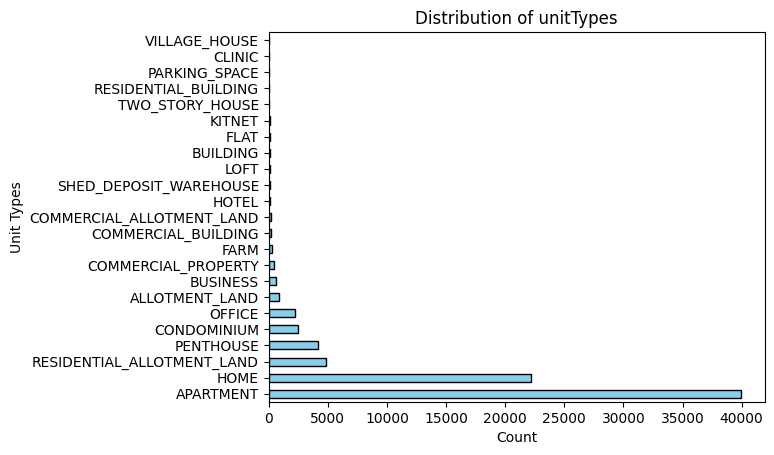

In [268]:
import matplotlib.pyplot as plt

# Assuming df_treated is your DataFrame
unit_types_counts = df_treated['unitTypes'].value_counts()

# Plotting the horizontal bar plot
unit_types_counts.plot(kind='barh', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Count')
plt.ylabel('Unit Types')
plt.title('Distribution of unitTypes')

# Display the plot
plt.show()

In [269]:
# Apartment
df_treated.loc[df_treated['unitTypes'] == 'APARTMENT', 'unitTypesCategory'] = 'apartment'
df_treated.loc[df_treated['unitTypes'] == 'KITNET', 'unitTypesCategory'] = 'apartment'
df_treated.loc[df_treated['unitTypes'] == 'PENTHOUSE', 'unitTypesCategory'] = 'apartment'
df_treated.loc[df_treated['unitTypes'] == 'LOFT', 'unitTypesCategory'] = 'apartment'
df_treated.loc[df_treated['unitTypes'] == 'FLAT', 'unitTypesCategory'] = 'apartment'

# House
df_treated.loc[df_treated['unitTypes'] == 'HOME', 'unitTypesCategory'] = 'house'

# Land
df_treated.loc[df_treated['unitTypes'] == 'RESIDENTIAL_ALLOTMENT_LAND', 'unitTypesCategory'] = 'land'
df_treated.loc[df_treated['unitTypes'] == 'COMMERCIAL_ALLOTMENT_LAND', 'unitTypesCategory'] = 'land'
df_treated.loc[df_treated['unitTypes'] == 'COMMERCIAL_BUILDING', 'unitTypesCategory'] = 'land'
df_treated.loc[df_treated['unitTypes'] == 'CONDOMINIUM', 'unitTypesCategory'] = 'land'
df_treated.loc[df_treated['unitTypes'] == 'ALLOTMENT_LAND', 'unitTypesCategory'] = 'land'

# Comercial
df_treated.loc[df_treated['unitTypes'] == 'BUSINESS', 'unitTypesCategory'] = 'commercial'
df_treated.loc[df_treated['unitTypes'] == 'OFFICE', 'unitTypesCategory'] = 'commercial'
df_treated.loc[df_treated['unitTypes'] == 'COMMERCIAL_PROPERTY', 'unitTypesCategory'] = 'commercial'

# Logistic
df_treated.loc[df_treated['unitTypes'] == 'SHED_DEPOSIT_WAREHOUSE', 'unitTypesCategory'] = 'logistic'

In [270]:
df_treated['unitTypesCategory'].value_counts()

unitTypesCategory
apartment     44295
house         22173
land           8597
commercial     3259
nan             523
logistic        113
Name: count, dtype: int64

In [271]:
# Remove column because, but it is possible to rethink the categorization
df_treated = df_treated.drop('unitTypes', axis=1)

In [272]:
df_treated.head()

,amenities,usableAreas,title,nonActivationReason,propertyType,unitSubTypes,id,portal,parkingSpaces,suites,...,address.district,address.name,address.state,address.neighborhood,address.poisList,address.pois,address.valuableZones,advertiserContact.chat,advertiserContact.phones,unitTypesCategory
0,"[PLAN, ELECTRICITY, SEWAGE, PAVED_STREET, INTE...",1590,TERRENO DE 1590 M2 PARA PERMUTA ÁREA CONSTRUÍD...,NonActivationReason_NONE,UNIT,[],2669338508,GRUPOZAP,[],[],...,,,Santa Catarina,Carianos,"[BS:Avenida Deputado Diomício Freitas (13), BS...",[],[],,[48996356797],land
1,[GARDEN],12,FLORIANóPOLIS - Box/Garagem - Itacorubi,NonActivationReason_NONE,UNIT,[],2584572975,GRUPOZAP,[1],[],...,,,Santa Catarina,Itacorubi,"[BS:Rodovia Admar Gonzaga (24), BS:Rodovia Adm...",[],[],,"[4833079001, 48999409000]",commercial
2,"[ELEVATOR, AIR_CONDITIONING]",12,FLORIANóPOLIS - Box/Garagem - Trindade,NonActivationReason_NONE,UNIT,[],2673141280,GRUPOZAP,[1],[],...,,,Santa Catarina,Trindade,"[BS:Rua Profa. Maria Flora Pausewang (01), BS:...",[],[],,"[4832443444, 48999822319]",commercial
3,[],12,FLORIANóPOLIS - Box/Garagem - Centro,NonActivationReason_NONE,UNIT,[],2665037649,GRUPOZAP,[1],[],...,,,Santa Catarina,Centro,"[BS:Avenida Hercílio Luz, BS:Rua dos Ilhéus, B...",[],[],,"[4830288383, 48991271724]",commercial
4,[GARAGE],12,"Garagem para Venda em Florianópolis, Centro",NonActivationReason_NONE,UNIT,[],2666977500,GRUPOZAP,[0],[0],...,,,Santa Catarina,Centro,"[BS:Avenida Hercílio Luz, BS:Rua dos Ilhéus, B...",[],[],,"[48984253415, 48999987245]",commercial


### nonActivationReason

In [273]:
# Remove column because there is only one value
df_treated = df_treated.drop('nonActivationReason', axis=1)

### propertyType

In [274]:
df_treated['propertyType'].value_counts()

propertyType
UNIT    78960
Name: count, dtype: int64

In [275]:
# Remove column because there is only one value
df_treated = df_treated.drop('propertyType', axis=1)

### unitSubTypes

In [276]:
df_treated['unitSubTypes'].value_counts()

unitSubTypes
[]                                      74582
[TWO_STORY_HOUSE]                        1695
[PENTHOUSE]                               800
[CONDOMINIUM]                             538
[STUDIO]                                  439
[DUPLEX]                                  281
[PENTHOUSE, DUPLEX]                       262
[CONDOMINIUM, TWO_STORY_HOUSE]            115
[SINGLE_STOREY_HOUSE]                      67
[OFFICE]                                   39
[LOFT]                                     36
[LOFT, DUPLEX]                             19
[RETAIL_CENTER]                            17
[CONDOMINIUM, SINGLE_STOREY_HOUSE]         11
[CLINIC]                                    9
[KITNET]                                    8
[FLAT]                                      6
[PENTHOUSE, TRIPLEX]                        6
[GALLERY]                                   6
[TRIPLEX]                                   6
[FLOOR]                                     6
[VILLAGE_HOUSE, TWO_S

In [277]:
# Remove column because is redundent with unityTypes
df_treated = df_treated.drop('unitSubTypes', axis=1)

### id

In [278]:
# Remove column because is a id number, but could be relevant when doing a time series analysis to identify time of listing
df_treated = df_treated.drop('id', axis=1)

### portal

In [279]:
df_treated['portal'].value_counts()

portal
GRUPOZAP    78960
Name: count, dtype: int64

In [280]:
# Remove column because there is only one value
df_treated = df_treated.drop('portal', axis=1)

### parkingSpaces

In [281]:
df_treated['parkingSpaces'].value_counts()

parkingSpaces
[2]     27008
[1]     26360
[]       7115
[3]      5647
[4]      5034
        ...  
[37]        1
[23]        1
[39]        1
[32]        1
[60]        1
Name: count, Length: 62, dtype: int64

- Look fo negative values within the column

In [282]:
import numpy as np

# Check for negative values
negative_values_mask = df_treated['parkingSpaces'].apply(lambda x: any(s < 0 if isinstance(s, list) else False for s in x) if isinstance(x, list) else x < 0)
rows_with_negative_values = df_treated[negative_values_mask]

# Check for NaN values
nan_values_mask = df_treated['parkingSpaces'].apply(lambda x: any(np.isnan(s) if isinstance(s, list) else np.isnan(x) if pd.notna(x) else False for s in x) if isinstance(x, list) else np.isnan(x) if pd.notna(x) else False)
rows_with_nan_values = df_treated[nan_values_mask]

if not rows_with_negative_values.empty:
    print("Negative values found in 'parkingSpaces' column in the following rows:")
    print(rows_with_negative_values)

if not rows_with_nan_values.empty:
    print("NaN values found in 'parkingSpaces' column in the following rows:")
    print(rows_with_nan_values)

if rows_with_negative_values.empty and rows_with_nan_values.empty:
    print("No negative or NaN values found in 'parkingSpaces' column.")


No negative or NaN values found in 'parkingSpaces' column.


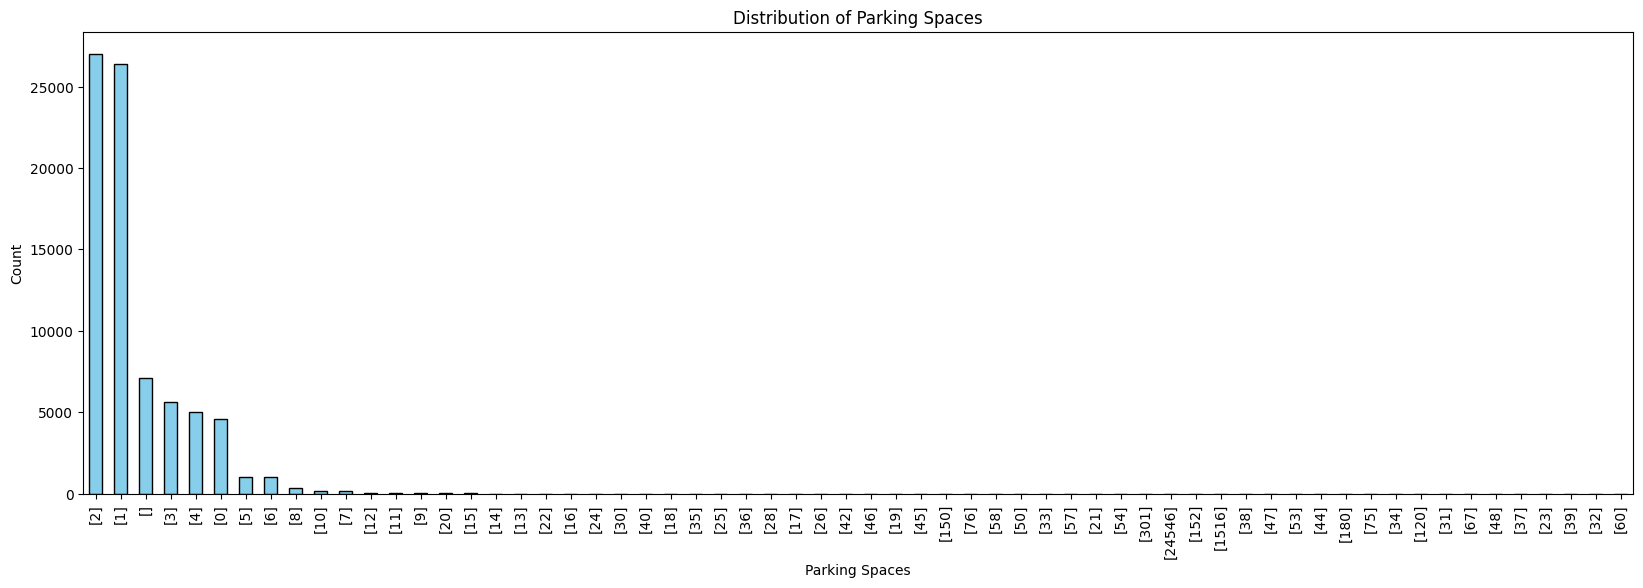

In [283]:
# Assuming df_treated is your DataFrame
parking_spaces_counts = df_treated['parkingSpaces'].value_counts()

# Set the figure size
plt.figure(figsize=(20, 6))

# Plotting the bar plot
parking_spaces_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Parking Spaces')
plt.ylabel('Count')
plt.title('Distribution of Parking Spaces')

# Display the plot
plt.show()

In [284]:
# Transform the column with lists to a column of numbers
df_treated['parkingSpaces'] = df_treated['parkingSpaces'].apply(lambda x: int(x[0]) if x else np.nan).astype('Int64')

In [285]:
# Count of <NA> values
na_count = df_treated['parkingSpaces'].isna().sum()

# Percentage of <NA> values
total_rows = len(df_treated)
percentage_na = (na_count / total_rows) * 100

print("Count of <NA> values:", na_count)
print("Percentage of <NA> values in the DataFrame: {:.2f}%".format(percentage_na))


Count of <NA> values: 7115
Percentage of <NA> values in the DataFrame: 9.01%


In [286]:
""" 
adds a new column to Dataframe called 'parkingSpacesCategory'. 
The values in this new column are determined based on the values in the 'parkingSpaces' column"""

df_treated.loc[df_treated['parkingSpaces'] == 0, 'parkingSpacesCategory'] = 'None'
df_treated.loc[df_treated['parkingSpaces'] == 1, 'parkingSpacesCategory'] = 'One'
df_treated.loc[df_treated['parkingSpaces'] == 2, 'parkingSpacesCategory'] = 'Two'
df_treated.loc[df_treated['parkingSpaces'] == 3, 'parkingSpacesCategory'] = 'Three'
df_treated.loc[df_treated['parkingSpaces'] >= 4, 'parkingSpacesCategory'] = 'Four or more'
df_treated.loc[df_treated['parkingSpaces'].isna(), 'parkingSpacesCategory'] = 'NaN'


In [287]:
df_treated['parkingSpacesCategory'].value_counts()

parkingSpacesCategory
Two             27008
One             26360
Four or more     8260
NaN              7115
Three            5647
None             4570
Name: count, dtype: int64

In [288]:
# Remove column because, but it is possible to rethink the categorization
#df_treated = df_treated.drop('parkingSpaces', axis=1)

### suites

In [289]:
df_treated['suites'].value_counts()

suites
[1]     33857
[]      10962
[2]     10274
[3]      9955
[0]      9239
[4]      3144
[5]       901
[6]       335
[7]        87
[8]        57
[10]       30
[11]       18
[13]       15
[9]        13
[33]        8
[20]        8
[16]        7
[12]        7
[17]        7
[14]        5
[21]        4
[18]        4
[15]        4
[26]        2
[19]        2
[25]        2
[30]        2
[24]        1
[35]        1
[27]        1
[40]        1
[44]        1
[43]        1
[50]        1
[39]        1
[46]        1
[60]        1
[54]        1
Name: count, dtype: int64

In [290]:
# Count of <NA> values
na_count_suites = df_treated['suites'].isna().sum()

# Percentage of <NA> values
total_rows_suites = len(df_treated)
percentage_na_suites = (na_count_suites / total_rows_suites) * 100

print("Count of <NA> values in 'suites' column:", na_count_suites)
print("Percentage of <NA> values in the 'suites' column: {:.2f}%".format(percentage_na_suites))


Count of <NA> values in 'suites' column: 0
Percentage of <NA> values in the 'suites' column: 0.00%


In [291]:
# Transform the column with lists to a column of numbers
df_treated['suites'] = df_treated['suites'].apply(lambda x: int(x[0]) if x else np.nan).astype('Int64')

In [292]:
df_treated['suites']

0        <NA>
1        <NA>
2        <NA>
3        <NA>
4           0
         ... 
78955       1
78956    <NA>
78957       1
78958       1
78959       2
Name: suites, Length: 78960, dtype: Int64

### publicationType

In [293]:
df_treated['publicationType'].value_counts()

publicationType
STANDARD         67056
PREMIUM          10478
SUPER_PREMIUM      794
PREMIERE_1         472
PREMIERE_2         160
Name: count, dtype: int64

### externalId

In [294]:
# Remove column because is an id number
df_treated = df_treated.drop('externalId', axis=1)

### bathrooms

In [295]:
# Transform the column with lists to a column of numbers
df_treated['bathrooms'] = df_treated['bathrooms'].apply(lambda x: int(x[0]) if x else np.nan).astype('Int64')

In [296]:
# Count of <NA> values
na_count = df_treated['bathrooms'].isna().sum()

# Percentage of <NA> values
total_rows = len(df_treated)
percentage_na = (na_count / total_rows) * 100

print("Count of <NA> values:", na_count)
print("Percentage of <NA> values in the DataFrame: {:.2f}%".format(percentage_na))


Count of <NA> values: 2748
Percentage of <NA> values in the DataFrame: 3.48%


In [297]:
df_treated.loc[df_treated['bathrooms'] == 0, 'bathroomsCategory'] = 'None'
df_treated.loc[df_treated['bathrooms'] == 1, 'bathroomsCategory'] = 'One'
df_treated.loc[df_treated['bathrooms'] == 2, 'bathroomsCategory'] = 'Two'
df_treated.loc[df_treated['bathrooms'] == 3, 'bathroomsCategory'] = 'Three'
df_treated.loc[df_treated['bathrooms'] >= 4, 'bathroomsCategory'] = 'Four or more'
df_treated.loc[df_treated['bathrooms'].isna(), 'bathroomsCategory'] = 'NaN'


In [298]:
df_treated['bathroomsCategory'].value_counts()

bathroomsCategory
Two             22800
Four or more    18376
Three           16210
One             15136
None             3690
NaN              2748
Name: count, dtype: int64

In [299]:
# Remove column because, but it is possible to rethink the categorization
#df_unnested_treated = df_treated.drop('bathrooms', axis=1)

### usageTypes

In [300]:
df_treated['usageTypes'].value_counts()

usageTypes
[RESIDENTIAL]                74095
[COMMERCIAL]                  3986
[RESIDENTIAL, COMMERCIAL]      879
Name: count, dtype: int64

In [301]:
# Remove column because is redundent with unityTypes
df_treated = df_treated.drop('usageTypes', axis=1)

### totalAreas

In [302]:
# Transform the column with lists to a column of numbers
df_treated['totalAreas'] = df_treated['totalAreas'].apply(lambda x: int(x[0]) if x else np.nan).astype('Int64')

In [303]:
# Count of <NA> values
na_count = df_treated['totalAreas'].isna().sum()

# Percentage of <NA> values
total_rows = len(df_treated)
percentage_na = (na_count / total_rows) * 100

print("Count of <NA> values in totalAreas:", na_count)
print("Percentage of <NA> values in the DataFrame: {:.2f}%".format(percentage_na))


Count of <NA> values in totalAreas: 3345
Percentage of <NA> values in the DataFrame: 4.24%


### advertiserId

In [304]:
# Remove column because is an id number, but it can be usefull to analisys the salesman influence
df_treated = df_treated.drop('advertiserId', axis=1)

### pricingInfos

In [305]:

# Display the random sample in table format
sampled_data = df_treated['pricingInfos'].sample(n=100)

# Save the sampled information to a CSV file
sampled_data.to_csv('pricingInfos.csv', index=False)

# Read the saved CSV file
read_sampled_data = pd.read_csv('pricingInfos.csv')

# Display the read data
print(read_sampled_data)

                                         pricingInfos
0      [{'price': '1100000', 'businessType': 'SALE'}]
1   [{'yearlyIptu': '1400', 'price': '790000', 'bu...
2   [{'yearlyIptu': '0', 'price': '1195000', 'busi...
3   [{'yearlyIptu': '0', 'price': '2250000', 'busi...
4   [{'yearlyIptu': '0', 'price': '415000', 'busin...
..                                                ...
95  [{'yearlyIptu': '0', 'price': '580000', 'busin...
96  [{'yearlyIptu': '1410', 'price': '2199000', 'b...
97  [{'yearlyIptu': '1', 'price': '6809209', 'busi...
98  [{'yearlyIptu': '115', 'price': '244800', 'bus...
99  [{'yearlyIptu': '1', 'price': '13500000', 'bus...

[100 rows x 1 columns]


In [306]:
key_value_types = {}

for row in df['pricingInfos']:
    if row:
        for item in row:
            for key, value in item.items():
                # Check if the key is already in the dictionary
                if key in key_value_types:
                    # If the type of the value is different, update the entry with 'mixed'
                    if key_value_types[key] != type(value).__name__:
                        key_value_types[key] = 'mixed'
                else:
                    # If the key is not in the dictionary, add it with the type of the value
                    key_value_types[key] = type(value).__name__

# Print the keys and their value types
print("Keys and their value types in the 'pricingInfos' objects:")
for key, value_type in key_value_types.items():
    print(f"{key}: {value_type}")

Keys and their value types in the 'pricingInfos' objects:
yearlyIptu: str
price: str
businessType: str
monthlyCondoFee: str
rentalInfo: dict


- RentalInfo is a dict, lets check what is inside

In [307]:
rental_info_contents = {}

for row in df['pricingInfos']:
    if row:
        for item in row:
            for key, value in item.items():
                if key == 'rentalInfo' and isinstance(value, dict):
                    # Store the contents of 'rentalInfo' in the dictionary
                    rental_info_contents[item.get('id')] = value

# Print the contents of 'rentalInfo'
print("Contents of 'rentalInfo' for each object:")
for listing_id, contents in rental_info_contents.items():
    print(f"Listing ID: {listing_id}")
    for key, value in contents.items():
        print(f"  {key}: {value}")
    print("\n")

Contents of 'rentalInfo' for each object:
Listing ID: None
  period: MONTHLY
  warranties: []




In [308]:
# Use json_normalize to flatten the 'pricingInfos' column
normalized_pricing_info = json_normalize(df_treated['pricingInfos'].apply(lambda x: x[0] if x else {}))

# Specify the position to insert the flattened columns
position = df_treated.columns.get_loc('pricingInfos')

# Concatenate the normalized DataFrame with the original DataFrame at the specified position
df_treated = pd.concat([df_treated.iloc[:, :position], normalized_pricing_info, df_treated.iloc[:, position+1:]], axis=1)

# Display the resulting DataFrame
print(df_treated)


                                               amenities  usableAreas  \
0      [PLAN, ELECTRICITY, SEWAGE, PAVED_STREET, INTE...         1590   
1                                               [GARDEN]           12   
2                           [ELEVATOR, AIR_CONDITIONING]           12   
3                                                     []           12   
4                                               [GARAGE]           12   
...                                                  ...          ...   
78955                                  [CLOSET, LAUNDRY]          141   
78956  [POOL, BARBECUE_GRILL, GATED_COMMUNITY, GYM, P...          794   
78957  [FURNISHED, BARBECUE_GRILL, GATED_COMMUNITY, G...          112   
78958                        [GARAGE, KITCHEN, ELEVATOR]          276   
78959  [POOL, FURNISHED, BARBECUE_GRILL, ELEVATOR, GA...          103   

                                                   title  parkingSpaces  \
0      TERRENO DE 1590 M2 PARA PERMUTA ÁREA CONS

- Display info about how our dataset looks like

In [309]:
# Display information about the DataFrame
df_info = df_treated.info()

# Print the result
print(df_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78960 entries, 0 to 78959
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   amenities                           78960 non-null  object 
 1   usableAreas                         78860 non-null  Int64  
 2   title                               78960 non-null  object 
 3   parkingSpaces                       71845 non-null  Int64  
 4   suites                              67998 non-null  Int64  
 5   publicationType                     78960 non-null  object 
 6   bathrooms                           76212 non-null  Int64  
 7   totalAreas                          75615 non-null  Int64  
 8   bedrooms                            78960 non-null  object 
 9   yearlyIptu                          69504 non-null  object 
 10  price                               78960 non-null  object 
 11  businessType                        78960

### showPrice

In [310]:
df_treated['showPrice'].value_counts()

showPrice
True    78960
Name: count, dtype: int64

In [311]:
# Remove column because doesnt bring any value 
df_treated = df_treated.drop('showPrice', axis=1)

### status, whatsappNumber, stamps (We will use linkVideoTour for now)

In [312]:
# Assuming your DataFrame is named df
columns_to_count = ['status', 'whatsappNumber', 'stamps']

for column in columns_to_count:
    print(f"Value counts for {column}:\n{df_treated[column].value_counts()}\n")


Value counts for status:
status
ACTIVE    78960
Name: count, dtype: int64

Value counts for whatsappNumber:
whatsappNumber
               8643
48998229955    3058
48998062611    2608
48991271724    2590
48991021364    1926
               ... 
48988118435       1
48991621722       1
48984078116       1
48991460648       1
44999306447       1
Name: count, Length: 1002, dtype: int64

Value counts for stamps:
stamps
[]                                                                                                        70185
[DATAZAP_APPROVED_SALE]                                                                                    6061
[FESTIVAL_DA_MUDANCA_BEST_FRIDAY_2023]                                                                      945
[FESTIVAL_DA_MUDANCA_AGOSTO_2023]                                                                           868
[FESTIVAL_DA_MUDANCA_MAIO_2023]                                                                             258
[FESTIVAL_DA_MUDANCA_AGO

In [313]:
# Remove the four columns since they dont have any relevant information
for column in columns_to_count:

    # Drop the column from the DataFrame
    df_treated = df_treated.drop(column, axis=1)

# Display the DataFrame after dropping the columns
print(df_treated)

                                               amenities  usableAreas  \
0      [PLAN, ELECTRICITY, SEWAGE, PAVED_STREET, INTE...         1590   
1                                               [GARDEN]           12   
2                           [ELEVATOR, AIR_CONDITIONING]           12   
3                                                     []           12   
4                                               [GARAGE]           12   
...                                                  ...          ...   
78955                                  [CLOSET, LAUNDRY]          141   
78956  [POOL, BARBECUE_GRILL, GATED_COMMUNITY, GYM, P...          794   
78957  [FURNISHED, BARBECUE_GRILL, GATED_COMMUNITY, G...          112   
78958                        [GARAGE, KITCHEN, ELEVATOR]          276   
78959  [POOL, FURNISHED, BARBECUE_GRILL, ELEVATOR, GA...          103   

                                                   title  parkingSpaces  \
0      TERRENO DE 1590 M2 PARA PERMUTA ÁREA CONS

In [314]:
# Display information about the DataFrame
df_info = df_treated.info()

# Print the result
print(df_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78960 entries, 0 to 78959
Data columns (total 46 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   amenities                           78960 non-null  object 
 1   usableAreas                         78860 non-null  Int64  
 2   title                               78960 non-null  object 
 3   parkingSpaces                       71845 non-null  Int64  
 4   suites                              67998 non-null  Int64  
 5   publicationType                     78960 non-null  object 
 6   bathrooms                           76212 non-null  Int64  
 7   totalAreas                          75615 non-null  Int64  
 8   bedrooms                            78960 non-null  object 
 9   yearlyIptu                          69504 non-null  object 
 10  price                               78960 non-null  object 
 11  businessType                        78960

In [315]:
# Assuming your DataFrame is named df
address_columns = [
    'address.country', 'address.zipCode', 'address.geoJson', 'address.city',
    'address.streetNumber', 'address.level', 'address.precision',
    'address.confidence', 'address.stateAcronym', 'address.source',
    'address.point.lon', 'address.point.source', 'address.point.lat',
    'address.ibgeCityId', 'address.zone', 'address.street',
    'address.locationId', 'address.district', 'address.name',
    'address.state', 'address.neighborhood', 'address.poisList',
    'address.pois', 'address.valuableZones'
]

for column in address_columns:
    # Display column name
    print(f"\nExploratory Analysis for Column: {column}")

    # Display data type
    print(f"Data Type: {df[column].dtype}")

    # Display value counts
    print(f"Value counts for {column}:\n{df[column].value_counts()}\n")

    # Display 10 random examples
    print(f"10 Random Examples for {column}:\n{df[column].sample(10).tolist()}\n")




Exploratory Analysis for Column: address.country
Data Type: object
Value counts for address.country:
address.country
BR    78960
Name: count, dtype: int64

10 Random Examples for address.country:
['BR', 'BR', 'BR', 'BR', 'BR', 'BR', 'BR', 'BR', 'BR', 'BR']


Exploratory Analysis for Column: address.zipCode
Data Type: object
Value counts for address.zipCode:
address.zipCode
88050005    1371
88058500     994
88030300     733
88063300     693
88034100     563
            ... 
88090351       1
88035245       1
88036420       1
88035210       1
88049617       1
Name: count, Length: 2590, dtype: int64

10 Random Examples for address.zipCode:
['88058300', '88070101', '88058170', '88032600', '88054600', '88058300', '88037000', '88060285', '88065030', '88025200']


Exploratory Analysis for Column: address.geoJson
Data Type: object
Value counts for address.geoJson:
address.geoJson
    78960
Name: count, dtype: int64

10 Random Examples for address.geoJson:
['', '', '', '', '', '', '', '', '', '

In [316]:
columns_to_drop = [
    'address.country', 
    'address.level',
    'address.confidence',
    'address.stateAcronym',
    'address.source',
    'address.point.source',
    'address.ibgeCityId',
    'address.zone', 
    'address.district',
    'address.name',
    'address.pois',
    'address.valuableZones',

]
# Drop the specified columns from the DataFrame
df_treated.drop(columns=columns_to_drop, inplace=True)

### Last columns () 

In [317]:
# Assuming your DataFrame is named df_treated
additional_columns = [
    'advertiserContact.chat', 'advertiserContact.phones',
]

for column in additional_columns:
    # Display column name
    print(f"\nExploratory Analysis for Column: {column}")

    # Display data type
    print(f"Data Type: {df_treated[column].dtype}")

    # Display value counts
    print(f"Value counts for {column}:\n{df_treated[column].value_counts()}\n")

    # Display 10 random examples
    print(f"10 Random Examples for {column}:\n{df_treated[column].sample(10).tolist()}\n")



Exploratory Analysis for Column: advertiserContact.chat
Data Type: object
Value counts for advertiserContact.chat:
advertiserContact.chat
    78960
Name: count, dtype: int64

10 Random Examples for advertiserContact.chat:
['', '', '', '', '', '', '', '', '', '']


Exploratory Analysis for Column: advertiserContact.phones
Data Type: object
Value counts for advertiserContact.phones:
advertiserContact.phones
[48998229955]                3058
[48998062611]                2608
[4830288383, 48991271724]    2590
[4833641364, 48991021364]    1926
[4832223222, 48998659090]    1779
                             ... 
[48998443656]                   1
[48988118435]                   1
[48991621722]                   1
[48984078116]                   1
[4430682873, 44999306447]       1
Name: count, Length: 1080, dtype: int64

10 Random Examples for advertiserContact.phones:
[['4833641364', '48991021364'], ['48984272533'], ['4830288383', '48991271724'], ['21999661400'], ['48999617311'], ['4899682077

In [318]:
columns_to_drop = [
    'advertiserContact.chat', 
    'advertiserContact.phones'
]
# Drop the specified columns from the DataFrame
df_treated.drop(columns=columns_to_drop, inplace=True)

In [319]:
df_treated[0:1].dtypes

amenities                              object
usableAreas                             Int64
title                                  object
parkingSpaces                           Int64
suites                                  Int64
publicationType                        object
bathrooms                               Int64
totalAreas                              Int64
bedrooms                               object
yearlyIptu                             object
price                                  object
businessType                           object
monthlyCondoFee                        object
rentalInfo.period                      object
rentalInfo.warranties                  object
rentalInfo.monthlyRentalTotalPrice     object
videoTourLink                          object
address.zipCode                        object
address.geoJson                        object
address.city                           object
address.streetNumber                   object
address.precision                 

In [320]:
df_treated['rentalInfo.monthlyRentalTotalPrice'].value_counts()

rentalInfo.monthlyRentalTotalPrice
6500     11
40000    10
35000    10
20000     9
8500      9
         ..
12640     1
12114     1
12244     1
12374     1
7863      1
Name: count, Length: 234, dtype: int64

In [321]:
df_treated.count()

amenities                             78960
usableAreas                           78860
title                                 78960
parkingSpaces                         71845
suites                                67998
publicationType                       78960
bathrooms                             76212
totalAreas                            75615
bedrooms                              78960
yearlyIptu                            69504
price                                 78960
businessType                          78960
monthlyCondoFee                       61653
rentalInfo.period                       724
rentalInfo.warranties                   724
rentalInfo.monthlyRentalTotalPrice      389
videoTourLink                         78960
address.zipCode                       78960
address.geoJson                       78960
address.city                          78960
address.streetNumber                  46255
address.precision                     78960
address.point.lon               

In [ ]:
import os

# Assuming df_treated is your treated DataFrame
# Specify the directory
output_directory = 'data/Florianopolis/florianopolis/Buy/treated'
csv_filename = 'df_buy_treated.csv'
json_filename = 'buy_treated.json'

# Create the directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Specify the filename for the CSV file

# Full path for saving the CSV file
csv_path = os.path.join(output_directory, csv_filename)

# Save the DataFrame to CSV
df_treated.to_csv(csv_path, index=False)

# Optionally, you can save to JSON as well
json_path = os.path.join(output_directory, json_filename)
df_treated.to_json(json_path, orient='records')
